In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
## Removed
# from sklearn.datasets import load_boston


In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
import pandas as pd


In [13]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# Machine Learning functioneaza bine pe date mici (0-1)

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform([[200], [300], [400], [500]])

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

In [21]:
MinMaxScaler().fit_transform([[200], [300], [1], [500], [600]])

array([[0.33222037],
       [0.49916528],
       [0.        ],
       [0.83305509],
       [1.        ]])

In [22]:
StandardScaler().fit_transform([[200], [300], [1], [500], [600]])

array([[-0.56367877],
       [-0.09472805],
       [-1.4968907 ],
       [ 0.8431734 ],
       [ 1.31212412]])

In [25]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
scaled_df = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [29]:
scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


# Trebuie sa impartim date in date de antrenament si date de test

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
lista = [1,2,3,4,5,6,7,8,9,10]

train_test_split(lista)

[[4, 5, 1, 7, 2, 9, 8], [3, 6, 10]]

In [40]:
lista = [1,2,3,4,5,6,7,8,9,10]

train_test_split(lista, test_size=0.2)

[[6, 2, 1, 4, 10, 9, 7, 8], [5, 3]]

In [46]:
lista1 = [1,2,3,4,5,6,7,8,9,10]
lista2 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

train_test_split(lista1, lista2, test_size=0.2)

[[10, 3, 5, 8, 6, 9, 4, 1],
 [2, 7],
 ['j', 'c', 'e', 'h', 'f', 'i', 'd', 'a'],
 ['b', 'g']]

In [47]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, data.target, test_size=0.2)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [51]:
input_shape = x_train.shape[1]
input_shape

8

In [54]:
model_1 = tf.keras.Sequential(
    [
        # Arata in functie de date -> 8 coloane -> shape (8,)
        tf.keras.Input(shape=(input_shape,)),


        # relu -> rectified liniar unit
        ## NR de neuroni ajustabil, la fel ca nr de straturi
        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(32, activation='relu'),


        ## FINAL -> OUTPUT -> 1 singura valoare
        tf.keras.layers.Dense(1)
    ]
)



In [55]:
model_1.compile(
    loss=tf.keras.losses.mae, ## Mean Absolute Error
    optimizer=tf.keras.optimizers.Adam(),  ### Adaptive Moment Estimation -> Best Practice
    metrics=['mae']
)

In [65]:
history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


In [66]:
history_1 = history_1.history
history_1

{'loss': [0.3499547243118286,
  0.34889936447143555,
  0.34638866782188416,
  0.346955269575119,
  0.34612393379211426,
  0.34327802062034607,
  0.34252026677131653,
  0.3414818048477173,
  0.3428385257720947,
  0.3412720263004303,
  0.34046393632888794,
  0.3393709063529968,
  0.33969569206237793,
  0.33818066120147705,
  0.3374881446361542,
  0.33701279759407043,
  0.3377557098865509,
  0.33401867747306824,
  0.33594322204589844,
  0.33530738949775696,
  0.3325228989124298,
  0.3320688009262085,
  0.3324945867061615,
  0.3317226469516754,
  0.33024850487709045,
  0.3296659290790558,
  0.32934409379959106,
  0.3296559751033783,
  0.328014999628067,
  0.3290589451789856,
  0.32959386706352234,
  0.32513177394866943,
  0.32749107480049133,
  0.32538723945617676,
  0.3268672823905945,
  0.32377931475639343,
  0.3248274624347687,
  0.3240380883216858,
  0.32275694608688354,
  0.32239899039268494,
  0.32269781827926636,
  0.3224746584892273,
  0.3211213946342468,
  0.3212793171405792,
  0.

In [67]:
loss = history_1['loss']
val_loss = history_1['val_loss']
mae = history_1['mae']
val_mae = history_1['val_mae']

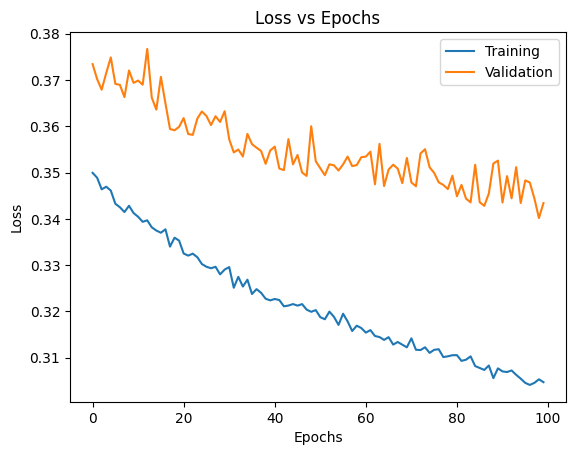

In [68]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()

In [69]:
model_2 = tf.keras.Sequential(
    [
        # Arata in functie de date -> 8 coloane -> shape (8,)
        tf.keras.Input(shape=(input_shape,)),


        # relu -> rectified liniar unit
        ## NR de neuroni ajustabil, la fel ca nr de straturi
        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(32, activation='relu'),


        ## FINAL -> OUTPUT -> 1 singura valoare
        tf.keras.layers.Dense(1)
    ]
)

model_2.compile(
    loss=tf.keras.losses.mae, ## Mean Absolute Error
    optimizer=tf.keras.optimizers.Adam(),  ### Adaptive Moment Estimation -> Best Practice
    metrics=['mae']
)


history_2 = model_2.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

In [70]:
history_2 = history_2.history
history_2

{'loss': [0.5989733934402466,
  0.43986037373542786,
  0.4180546700954437,
  0.40707290172576904,
  0.4005388617515564,
  0.3911711573600769,
  0.3840581774711609,
  0.3747684061527252,
  0.3693234622478485,
  0.3661859631538391,
  0.36183640360832214,
  0.35792356729507446,
  0.35489022731781006,
  0.353191077709198,
  0.3486187756061554,
  0.3481166362762451,
  0.3464425802230835,
  0.34547269344329834,
  0.3419886529445648,
  0.3413262963294983,
  0.34040364623069763,
  0.33864495158195496,
  0.33730950951576233,
  0.3370124399662018,
  0.3378030061721802,
  0.33431312441825867,
  0.33392876386642456,
  0.3324274718761444,
  0.3322362005710602,
  0.330005407333374,
  0.32886427640914917,
  0.33046677708625793,
  0.32851481437683105,
  0.3302192687988281,
  0.32759085297584534,
  0.32748842239379883,
  0.32669541239738464,
  0.325798898935318,
  0.3263107240200043,
  0.3248923718929291,
  0.32427331805229187,
  0.32418954372406006,
  0.32424965500831604,
  0.3230076730251312,
  0.322

In [71]:
loss = history_2['loss']
val_loss = history_2['val_loss']
mae = history_2['mae']
val_mae = history_2['val_mae']

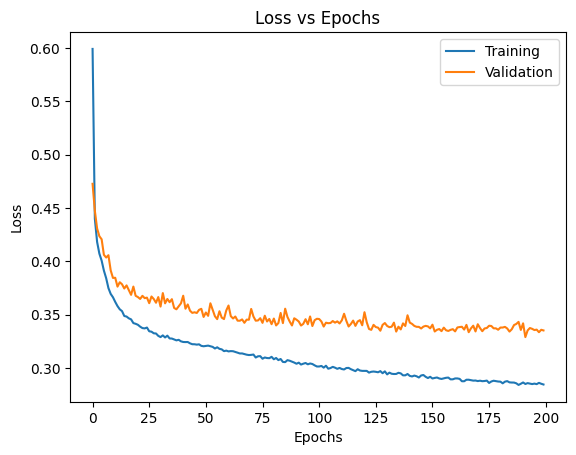

In [72]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show()